# Web Scraping with EDA  Project
- Product :- Air Conditioners
- Website :- Flipkart
- Teammates :- Vydehi, Sundhar

# Data Collection

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [4]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

for i in range(1,5):
    Flipkart_URLS = """https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page="""+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D")
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))
    print("ton-----",len(ton))

https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=1
brand----- 24
model----- 24
price----- 24
power_consumption----- 24
room_size----- 24
warranty----- 24
rating----- 24
ton----- 24
https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=2
brand----- 48
model----- 48
price----- 48
power_consumption----- 48
room_size----- 48
warranty----- 48
rating----- 48
ton----- 48
https://www.flipkart.com/search?q=air+co

In [9]:
power_consumption.insert(91,np.nan)

In [10]:
Dictionary_1 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [11]:
Data_Frame_1 = pd.DataFrame(Dictionary_1)

In [12]:
Data_Frame_1

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832,111,1,"₹36,999",4.2,1.5
1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688,90,1,"₹29,980",3.9,1
2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260,111,1,"₹37,999",4.3,1.5
3,LG,LG Super Convertible 5,1050,111,1,"₹35,490",4.1,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624,90,1,"₹27,999",4.1,1
...,...,...,...,...,...,...,...,...
91,SAMSUNG,SAMSUNG Convertible 5,NaN,111,1,"₹33,999",4.3,1.5
92,SAMSUNG,SAMSUNG 1 Ton 4 Star Split Inverter AC,960,90,1,"₹32,999",4.1,1
93,ONIDA,ONIDA 1 Ton 5 Star Split Inverter AC,820,90,1,"₹31,490",4.5,1
94,Godrej,Godrej 1.5 Ton 5 Star Split Inverter Convertib...,840,111,1,"₹37,260",4.3,1.5


In [13]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

for i in range(5,9):
    Flipkart_URLS = """https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page="""+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D")
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))
    print("ton-----",len(ton))

https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=5
brand----- 24
model----- 24
price----- 24
power_consumption----- 24
room_size----- 24
warranty----- 24
rating----- 24
ton----- 24
https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=6
brand----- 48
model----- 48
price----- 48
power_consumption----- 48
room_size----- 48
warranty----- 48
rating----- 48
ton----- 48
https://www.flipkart.com/search?q=air+co

In [14]:
power_consumption.insert(78,np.nan)
power_consumption.insert(91,np.nan)
warranty.insert(91,np.nan)

In [15]:
Dictionary_2 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [16]:
Data_Frame_2 = pd.DataFrame(Dictionary_2)

In [17]:
Data_Frame_2

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,MarQ,MarQ by Flipkart Convertible 4,578,90,1,"₹25,999",4,0.8
1,MOTOROLA,MOTOROLA 1.5 Ton 5 Star Split Dual Inverter Sm...,865,111,1,"₹37,990",4.3,1.5
2,Lloyd,Lloyd 1.5 Ton 5 Star Split Inverter AC with Wi,864,111,1,"₹39,999",4.2,1.5
3,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832,111,1,"₹36,999",4.2,1.5
4,Panasonic,Panasonic 1.5 Ton 3 Star Split Inverter AC,1056,111,1,"₹34,999",4.2,1.5
...,...,...,...,...,...,...,...,...
91,Hitachi,Hitachi 1.5 Ton 3 Star Split Inverter AC,NaN,111,NaN,"₹35,995",4.1,1.5
92,Lloyd,Lloyd 1 Ton 5 Star Split Inverter AC,574,90,1,"₹35,599",4.3,1
93,Whirlpool,Whirlpool 4 in 1 Convertible Cooling 1 Ton 5 S...,840,90,1,"₹34,990",4.1,1
94,SAMSUNG,SAMSUNG 1.5 Ton 4 Star Hot and Cold Split Inve...,1490,111,1,"₹40,990",3.7,1.5


In [19]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

for i in range(9,13):
    Flipkart_URLS = """https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page="""+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D")
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))
    print("ton-----",len(ton))

https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=9
brand----- 24
model----- 24
price----- 24
power_consumption----- 20
room_size----- 24
warranty----- 21
rating----- 24
ton----- 24
https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=10
brand----- 48
model----- 48
price----- 48
power_consumption----- 44
room_size----- 48
warranty----- 45
rating----- 48
ton----- 48
https://www.flipkart.com/search?q=air+c

In [20]:
power_consumption.insert(1,np.nan)
power_consumption.insert(2,np.nan)
power_consumption.insert(6,np.nan)
power_consumption.insert(13,np.nan)
warranty.insert(2,np.nan)
warranty.insert(6,np.nan)
warranty.insert(13,np.nan)
power_consumption.insert(49,np.nan)
warranty.insert(49,np.nan)
power_consumption.insert(91,np.nan)
power_consumption.insert(94,np.nan)
warranty.insert(91,np.nan)
warranty.insert(94,np.nan)
room_size.insert(75,np.nan)

In [21]:
Dictionary_3 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [22]:
Data_Frame_3 = pd.DataFrame(Dictionary_3)

In [23]:
Data_Frame_3

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG Super Convertible 6,960,90,1,"₹34,490",3.7,1
1,Lloyd,Lloyd 1 Ton 3 Star Portable AC,NaN,90,1,"₹33,939",NaN,1
2,Panasonic,Panasonic 1.5 Ton Split Inverter AC,NaN,111,NaN,"₹34,000",NaN,1.5
3,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832,111,1,"₹36,999",4.2,1.5
4,IFB,IFB 1.5 Ton 5 Star Split Inverter AC,2590,111,1,"₹41,990",4.3,1.5
...,...,...,...,...,...,...,...,...
91,Hitachi,Hitachi 1.5 Ton 3 Star Split Inverter AC,NaN,111,NaN,"₹35,995",4.1,1.5
92,Daikin,Daikin 1.5 Ton 5 Star Split Inverter with Anti...,1415,111,1,"₹46,200",4.2,1.5
93,Haier,Haier 1.5 Ton Split AC,1290,111,1,"₹34,199",NaN,1.5
94,Daikin,Daikin 1.5 Ton 4 Star Split Inverter AC,NaN,111,NaN,"₹38,990",NaN,1.5


In [31]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

for i in range(13,18):
    Flipkart_URLS = """https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page="""+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D")
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))
    print("ton-----",len(ton))

https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=13
brand----- 24
model----- 24
price----- 23
power_consumption----- 22
room_size----- 24
warranty----- 21
rating----- 24
ton----- 24
https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=14
brand----- 48
model----- 48
price----- 47
power_consumption----- 46
room_size----- 48
warranty----- 44
rating----- 48
ton----- 48
https://www.flipkart.com/search?q=air+

In [32]:
price.insert(9,np.nan)
power_consumption.insert(2,np.nan)
power_consumption.insert(16,np.nan)
warranty.insert(2,np.nan)
warranty.insert(16,np.nan)
warranty.insert(17,np.nan)
warranty.insert(37,np.nan)
warranty.insert(115,np.nan)
warranty.insert(119,np.nan)

In [33]:
Dictionary_4 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [34]:
Data_Frame_4 = pd.DataFrame(Dictionary_4)

In [35]:
Data_Frame_4

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,IFB,IFB 7 Stage Air Treatment 1.5 Ton 5 Star Split...,1370,111,1,"₹42,990",4.3,1.5
1,Voltas,Voltas 1.5 Ton 3 Star Split Inverter AC,650,111,1,"₹36,990",4.6,1.5
2,Blue,Blue Star 2 Ton Split AC,NaN,151,NaN,"₹52,989",NaN,2
3,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832,111,1,"₹36,999",4.2,1.5
4,Lloyd,Lloyd 1.5 Ton 5 Star Split Inverter AC,886,111,1,"₹43,369",NaN,1.5
...,...,...,...,...,...,...,...,...
115,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624,90,NaN,"₹27,999",4.1,1
116,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140,90,1,"₹34,000",5,1
117,Panasonic,Panasonic 1 Ton 5 Star Split Inverter AC with Wi,915,90,1,"₹42,359",NaN,1
118,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,1435,111,1,"₹39,699",NaN,1.5


# Creating A Data Frame

In [36]:
df1 = pd.concat([Data_Frame_1,Data_Frame_2],axis=0)

In [37]:
df2 = pd.concat([Data_Frame_3,Data_Frame_4],axis=0)

In [38]:
Final_Data_Frame = pd.concat([df1,df2],axis=0)

In [39]:
Final_Data_Frame

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832,111,1,"₹36,999",4.2,1.5
1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688,90,1,"₹29,980",3.9,1
2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260,111,1,"₹37,999",4.3,1.5
3,LG,LG Super Convertible 5,1050,111,1,"₹35,490",4.1,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624,90,1,"₹27,999",4.1,1
...,...,...,...,...,...,...,...,...
115,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624,90,NaN,"₹27,999",4.1,1
116,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140,90,1,"₹34,000",5,1
117,Panasonic,Panasonic 1 Ton 5 Star Split Inverter AC with Wi,915,90,1,"₹42,359",NaN,1
118,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,1435,111,1,"₹39,699",NaN,1.5


# To CSV File

In [41]:
Final_Data_Frame.to_csv(r"C:\Users\saisu\OneDrive\Desktop\Flipkart_Project")

In [2]:
Data_Frame = pd.read_csv(r"C:\Users\saisu\OneDrive\Desktop\Flipkart_Project")

# Data Cleaning

In [3]:
Data_Frame

,Unnamed: 0,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1.0,"₹36,999",4.2,1.5
1,1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1.0,"₹29,980",3.9,1.0
2,2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260.0,111.0,1.0,"₹37,999",4.3,1.5
3,3,LG,LG Super Convertible 5,1050.0,111.0,1.0,"₹35,490",4.1,1.5
4,4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1.0,"₹27,999",4.1,1.0
...,...,...,...,...,...,...,...,...,...
403,115,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,NaN,"₹27,999",4.1,1.0
404,116,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140.0,90.0,1.0,"₹34,000",5.0,1.0
405,117,Panasonic,Panasonic 1 Ton 5 Star Split Inverter AC with Wi,915.0,90.0,1.0,"₹42,359",NaN,1.0
406,118,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,1435.0,111.0,1.0,"₹39,699",NaN,1.5


In [4]:
Data_Frame.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
Data_Frame

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1.0,"₹36,999",4.2,1.5
1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1.0,"₹29,980",3.9,1.0
2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260.0,111.0,1.0,"₹37,999",4.3,1.5
3,LG,LG Super Convertible 5,1050.0,111.0,1.0,"₹35,490",4.1,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1.0,"₹27,999",4.1,1.0
...,...,...,...,...,...,...,...,...
403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,NaN,"₹27,999",4.1,1.0
404,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140.0,90.0,1.0,"₹34,000",5.0,1.0
405,Panasonic,Panasonic 1 Ton 5 Star Split Inverter AC with Wi,915.0,90.0,1.0,"₹42,359",NaN,1.0
406,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,1435.0,111.0,1.0,"₹39,699",NaN,1.5


In [6]:
Data_Frame = Data_Frame.reset_index()

In [7]:
Data_Frame

,index,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1.0,"₹36,999",4.2,1.5
1,1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1.0,"₹29,980",3.9,1.0
2,2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260.0,111.0,1.0,"₹37,999",4.3,1.5
3,3,LG,LG Super Convertible 5,1050.0,111.0,1.0,"₹35,490",4.1,1.5
4,4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1.0,"₹27,999",4.1,1.0
...,...,...,...,...,...,...,...,...,...
403,403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,NaN,"₹27,999",4.1,1.0
404,404,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140.0,90.0,1.0,"₹34,000",5.0,1.0
405,405,Panasonic,Panasonic 1 Ton 5 Star Split Inverter AC with Wi,915.0,90.0,1.0,"₹42,359",NaN,1.0
406,406,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,1435.0,111.0,1.0,"₹39,699",NaN,1.5


In [8]:
Data_Frame.drop(['index'],axis=1,inplace=True)

In [9]:
Data_Frame

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1.0,"₹36,999",4.2,1.5
1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1.0,"₹29,980",3.9,1.0
2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260.0,111.0,1.0,"₹37,999",4.3,1.5
3,LG,LG Super Convertible 5,1050.0,111.0,1.0,"₹35,490",4.1,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1.0,"₹27,999",4.1,1.0
...,...,...,...,...,...,...,...,...
403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,NaN,"₹27,999",4.1,1.0
404,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140.0,90.0,1.0,"₹34,000",5.0,1.0
405,Panasonic,Panasonic 1 Ton 5 Star Split Inverter AC with Wi,915.0,90.0,1.0,"₹42,359",NaN,1.0
406,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,1435.0,111.0,1.0,"₹39,699",NaN,1.5


In [10]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  408 non-null    object 
 1   Model                  408 non-null    object 
 2   Power_Consumption_kWh  396 non-null    float64
 3   Room_Size_sqft         407 non-null    float64
 4   Warranty_Years         395 non-null    float64
 5   Price                  407 non-null    object 
 6   Rating                 342 non-null    float64
 7   Ton                    406 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.6+ KB


In [11]:
Data_Frame.shape

(408, 8)

In [12]:
Data_Frame['Power_Consumption_kWh'].fillna("0",inplace=True)
Data_Frame['Room_Size_sqft'].fillna("0",inplace=True)
Data_Frame['Warranty_Years'].fillna("0",inplace=True)
Data_Frame['Price'].fillna("0",inplace=True)
Data_Frame['Rating'].fillna("0",inplace=True)
Data_Frame['Ton'].fillna("0",inplace=True)

In [13]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Brand                  408 non-null    object
 1   Model                  408 non-null    object
 2   Power_Consumption_kWh  408 non-null    object
 3   Room_Size_sqft         408 non-null    object
 4   Warranty_Years         408 non-null    object
 5   Price                  408 non-null    object
 6   Rating                 408 non-null    object
 7   Ton                    408 non-null    object
dtypes: object(8)
memory usage: 25.6+ KB


In [14]:
Data_Frame['Price'] = list(map(lambda x:x.replace("₹","").replace(",",""),Data_Frame['Price']))

In [15]:
Data_Frame['Price']

0      36999
1      29980
2      37999
3      35490
4      27999
       ...  
403    27999
404    34000
405    42359
406    39699
407    33999
Name: Price, Length: 408, dtype: object

In [16]:
Data_Frame['Power_Consumption_kWh'] = Data_Frame['Power_Consumption_kWh'].astype("float")
Data_Frame['Room_Size_sqft'] = Data_Frame['Room_Size_sqft'].astype("float")
Data_Frame['Warranty_Years'] = Data_Frame['Warranty_Years'].astype("int")
Data_Frame['Rating'] = Data_Frame['Rating'].astype("float")
Data_Frame['Ton'] = Data_Frame['Ton'].astype("float")
Data_Frame['Price'] = Data_Frame['Price'].astype("int")

In [17]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  408 non-null    object 
 1   Model                  408 non-null    object 
 2   Power_Consumption_kWh  408 non-null    float64
 3   Room_Size_sqft         408 non-null    float64
 4   Warranty_Years         408 non-null    int32  
 5   Price                  408 non-null    int32  
 6   Rating                 408 non-null    float64
 7   Ton                    408 non-null    float64
dtypes: float64(4), int32(2), object(2)
memory usage: 22.4+ KB


In [18]:
Data_Frame

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1,36999,4.2,1.5
1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1,29980,3.9,1.0
2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260.0,111.0,1,37999,4.3,1.5
3,LG,LG Super Convertible 5,1050.0,111.0,1,35490,4.1,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
...,...,...,...,...,...,...,...,...
403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,0,27999,4.1,1.0
404,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140.0,90.0,1,34000,5.0,1.0
405,Panasonic,Panasonic 1 Ton 5 Star Split Inverter AC with Wi,915.0,90.0,1,42359,0.0,1.0
406,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,1435.0,111.0,1,39699,0.0,1.5


# Data Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
Data_Frame.Brand.unique()

array(['SAMSUNG', 'Hitachi', 'CARRIER', 'LG', 'Whirlpool', 'Panasonic',
       'MarQ', 'Voltas', 'Daikin', 'Lloyd', 'realme', 'Blue', 'IFB',
       'ONIDA', 'Godrej', 'MOTOROLA', 'Thomson', 'TCL', 'Midea', 'Sansui',
       'Haier', 'Nokia', 'Mitsubishi', 'TOSHIBA', 'Hisense', 'iFFALCON'],
      dtype=object)

In [20]:
Data_Frame.Brand.nunique()

26

In [21]:
Data_Frame.Brand.value_counts()

SAMSUNG       82
Hitachi       55
Panasonic     36
Daikin        34
Voltas        33
Lloyd         29
Blue          28
LG            20
CARRIER       16
Whirlpool     16
MarQ          10
Godrej         9
Haier          6
ONIDA          6
realme         6
IFB            5
Midea          3
Sansui         3
MOTOROLA       2
Thomson        2
TOSHIBA        2
TCL            1
Nokia          1
Mitsubishi     1
Hisense        1
iFFALCON       1
Name: Brand, dtype: int64

In [23]:
Data_Frame.describe()

,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
count,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000
mean,1205.965686,107.64951,0.968137,36506.553922,3.523284,1.613235
std,606.455026,16.77257,0.175850,7094.705214,1.561774,3.836425
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,832.000000,90.00000,1.000000,32350.000000,4.000000,1.000000
50%,1095.000000,111.00000,1.000000,35990.000000,4.200000,1.500000
75%,1586.250000,111.00000,1.000000,38990.000000,4.300000,1.500000
max,5800.000000,151.00000,1.000000,64810.000000,5.000000,75.000000


In [28]:
sns.set_style('darkgrid')

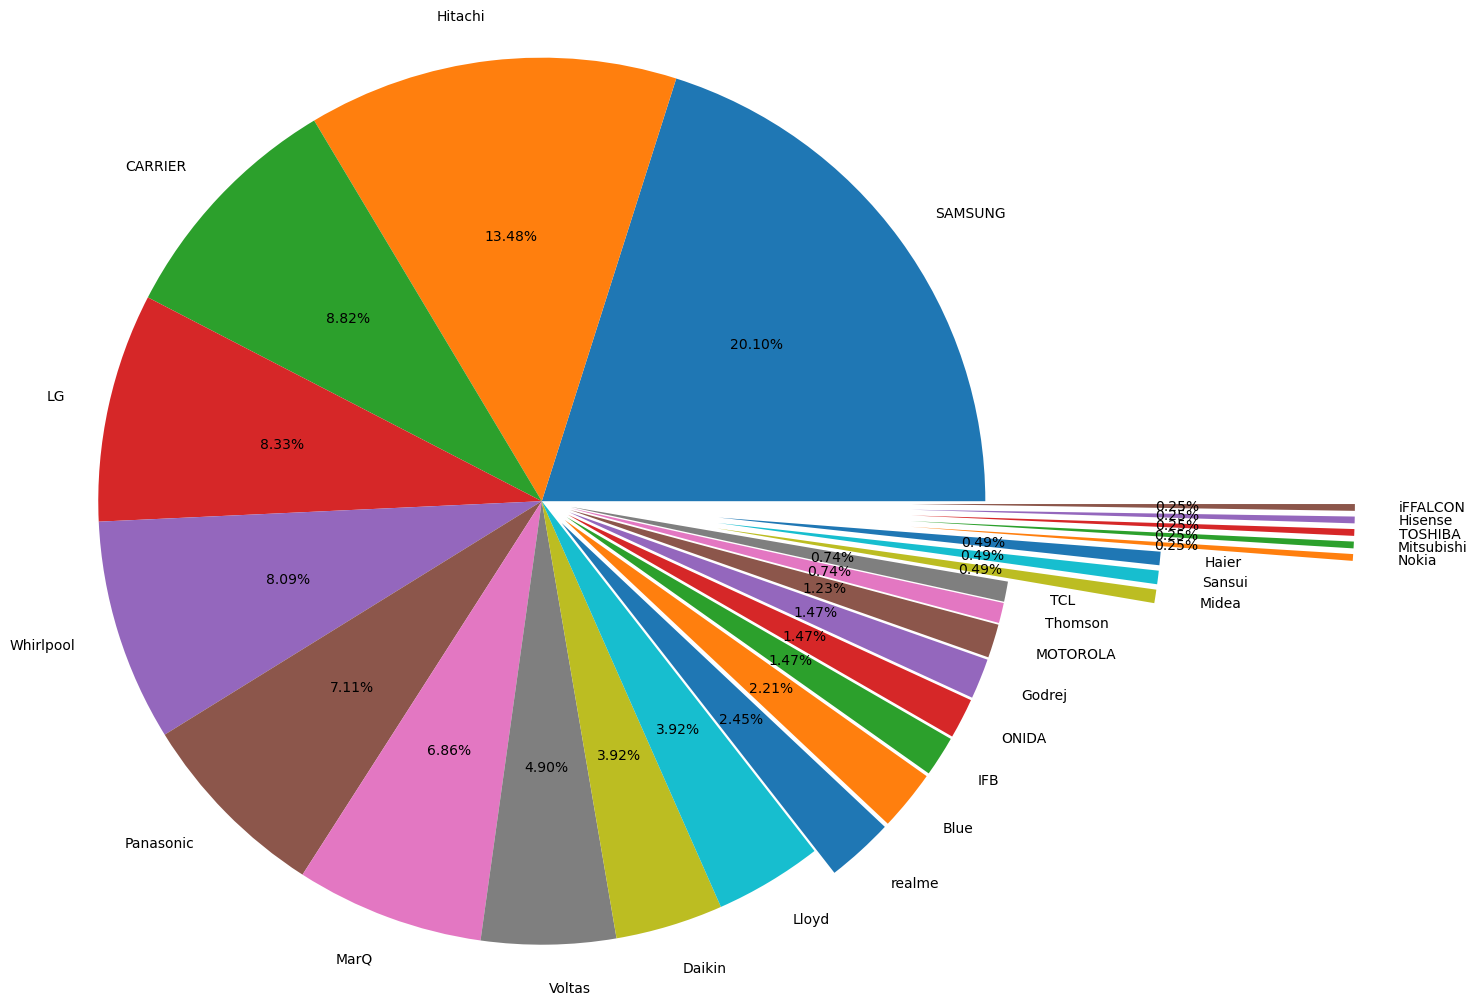

In [26]:
plt.pie(Data_Frame.Brand.value_counts(),autopct="%0.2f%%",labels=Data_Frame.Brand.unique(),explode=[0,0,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1.2,1.2,1.2,2.5,2.5,2.5,2.5,2.5],radius=3)
plt.show()

Text(0.5, 1.0, 'Histogram For Price')

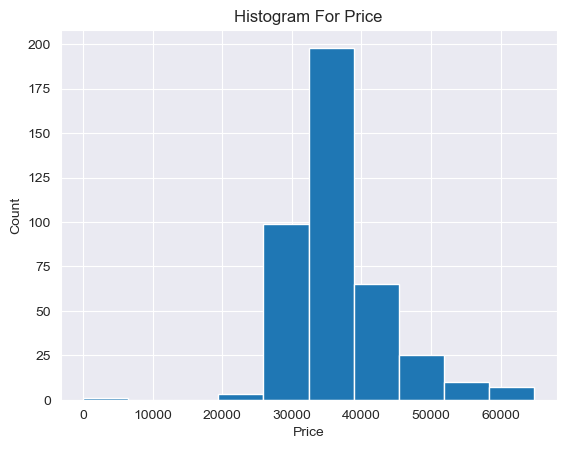

In [79]:
plt.hist(Data_Frame.Price)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram For Price')

Text(0.5, 1.0, 'Histogram For Rating')

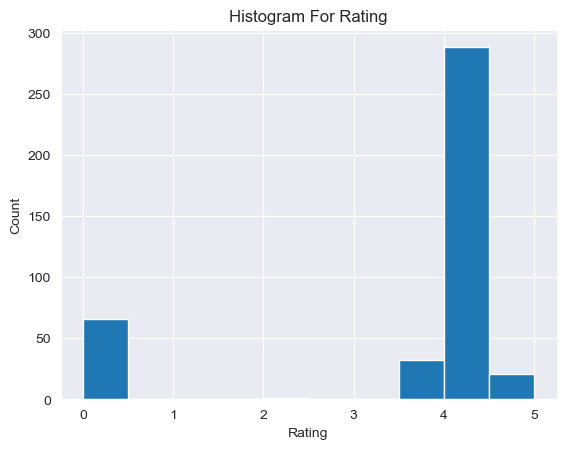

In [81]:
plt.hist(Data_Frame.Rating)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram For Rating')

C:\Users\saisu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'SAMSUNG'),
  Text(1, 0, 'Hitachi'),
  Text(2, 0, 'CARRIER'),
  Text(3, 0, 'LG'),
  Text(4, 0, 'Whirlpool'),
  Text(5, 0, 'Panasonic'),
  Text(6, 0, 'MarQ'),
  Text(7, 0, 'Voltas'),
  Text(8, 0, 'Daikin'),
  Text(9, 0, 'Lloyd'),
  Text(10, 0, 'realme'),
  Text(11, 0, 'Blue'),
  Text(12, 0, 'IFB'),
  Text(13, 0, 'ONIDA'),
  Text(14, 0, 'Godrej'),
  Text(15, 0, 'MOTOROLA'),
  Text(16, 0, 'Thomson'),
  Text(17, 0, 'TCL'),
  Text(18, 0, 'Midea'),
  Text(19, 0, 'Sansui'),
  Text(20, 0, 'Haier'),
  Text(21, 0, 'Nokia'),
  Text(22, 0, 'Mitsubishi'),
  Text(23, 0, 'TOSHIBA'),
  Text(24, 0, 'Hisense'),
  Text(25, 0, 'iFFALCON')])

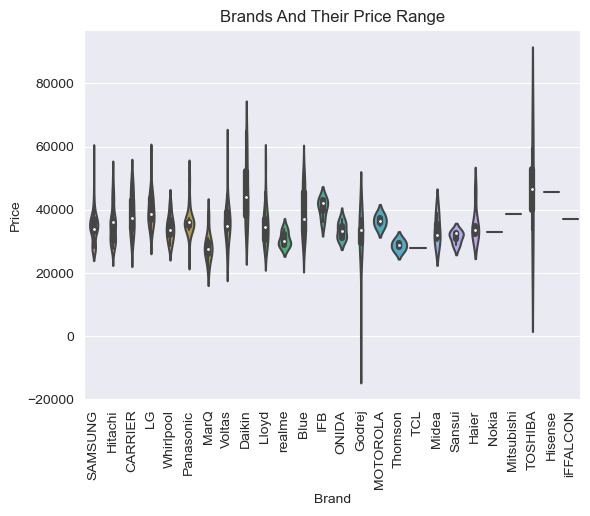

In [97]:
sns.violinplot(Data_Frame['Brand'],Data_Frame['Price'])
plt.title('Brands And Their Price Range')
plt.xticks(rotation = 90)

C:\Users\saisu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Room_Size_sqft'>

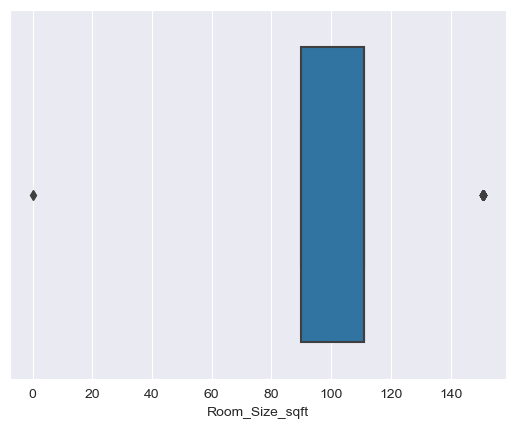

In [121]:
sns.boxplot(Data_Frame['Room_Size_sqft'])

C:\Users\saisu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Power_Consumption_kWh'>

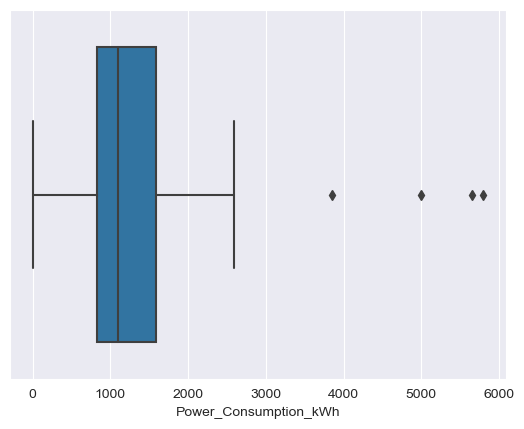

In [58]:
sns.boxplot(Data_Frame['Power_Consumption_kWh'])

<AxesSubplot:>

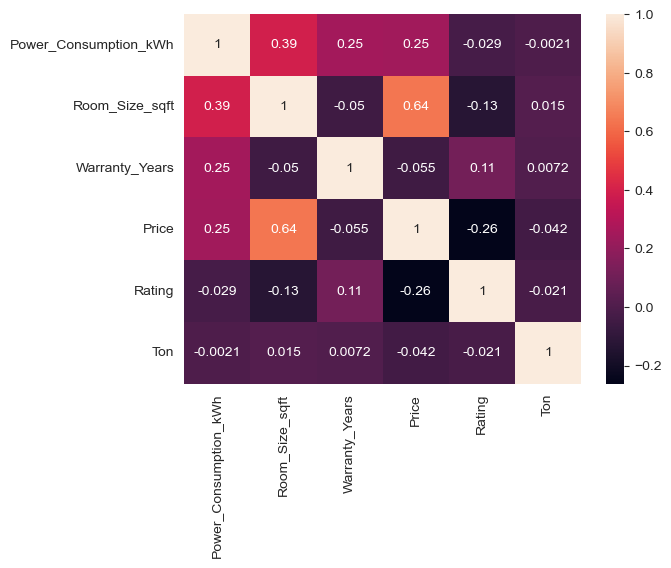

In [54]:
sns.heatmap(Data_Frame.corr(),annot = True)

In [119]:
Data_Frame.groupby('Brand').count()

,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
Brand,,,,,,,
Blue,28,28,28,28,28,28,28
CARRIER,16,16,16,16,16,16,16
Daikin,34,34,34,34,34,34,34
Godrej,9,9,9,9,9,9,9
Haier,6,6,6,6,6,6,6
Hisense,1,1,1,1,1,1,1
Hitachi,55,55,55,55,55,55,55
IFB,5,5,5,5,5,5,5
LG,20,20,20,20,20,20,20


In [120]:
Data_Frame[Data_Frame['Price']<=30000]

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1,29980,3.9,1.0
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
8,MarQ,MarQ by Flipkart Turbo Cool 4,704.0,90.0,1,26499,4.7,1.0
9,MarQ,MarQ by Flipkart Convertible 4,1056.0,111.0,1,29499,4.0,1.5
21,MarQ,MarQ by Flipkart Turbo Cool 4,704.0,111.0,1,29999,4.7,1.5
...,...,...,...,...,...,...,...,...
379,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
381,Blue,Blue Star 1 Ton 3 Star Window AC,823.0,90.0,1,27750,0.0,1.0
388,Lloyd,Lloyd 1.5 Ton 4 Star Window AC,1180.0,111.0,1,28999,4.2,1.5
391,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1,29980,3.9,1.0


In [129]:
pd.crosstab(Data_Frame.Rating,Data_Frame.Price)

Price,0,21490,24499,25499,25999,26499,26999,27490,27750,27950,...,54990,56500,56849,56860,58490,59490,60000,60220,64808,64810
Rating,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,1,0,0,1,1
2.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4.1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4.2,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
Data_Frame[Data_Frame['Rating']>=4.0]

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1,36999,4.2,1.5
2,CARRIER,CARRIER 1.5 Ton 5 Star Split Inverter AC,1260.0,111.0,1,37999,4.3,1.5
3,LG,LG Super Convertible 5,1050.0,111.0,1,35490,4.1,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
5,CARRIER,CARRIER 1.2 Ton 5 Star Split Inverter AC,950.0,91.0,1,33499,4.2,1.2
...,...,...,...,...,...,...,...,...
401,ONIDA,ONIDA 1.5 Ton 3 Star Split Dual Inverter AC,1820.0,111.0,1,30990,4.3,1.5
402,TOSHIBA,TOSHIBA 1 Ton 3 Star Split Inverter AC,1200.0,90.0,1,33490,4.7,1.0
403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,0,27999,4.1,1.0
404,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140.0,90.0,1,34000,5.0,1.0


In [22]:
Data_Frame[Data_Frame['Brand']=='SAMSUNG']

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1,36999,4.2,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
11,SAMSUNG,SAMSUNG Convertible 5,1700.0,111.0,1,33999,4.3,1.5
14,SAMSUNG,SAMSUNG Convertible 5,1490.0,111.0,1,35499,4.2,1.5
15,SAMSUNG,SAMSUNG Convertible 1.5 Ton 4 Star Split Inver...,832.0,111.0,1,33999,4.2,1.5
...,...,...,...,...,...,...,...,...
379,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
383,SAMSUNG,SAMSUNG Convertible 5,1700.0,111.0,1,33999,4.3,1.5
387,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1,36999,4.2,1.5
403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,0,27999,4.1,1.0


In [23]:
Data_Frame[Data_Frame['Ton']==1.0 ]

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
1,Hitachi,Hitachi 1 Ton 3 Star Split Inverter AC,688.0,90.0,1,29980,3.9,1.0
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
8,MarQ,MarQ by Flipkart Turbo Cool 4,704.0,90.0,1,26499,4.7,1.0
19,Panasonic,Panasonic 1 Ton 3 Star Split Inverter AC with Wi,1095.0,90.0,1,33490,4.3,1.0
26,LG,LG AI Convertible 6,521.0,90.0,1,40490,0.0,1.0
...,...,...,...,...,...,...,...,...
400,Haier,Haier 1 Ton 3 Star Split Inverter AC,732.0,90.0,1,32977,0.0,1.0
402,TOSHIBA,TOSHIBA 1 Ton 3 Star Split Inverter AC,1200.0,90.0,1,33490,4.7,1.0
403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,0,27999,4.1,1.0
404,Whirlpool,Whirlpool 1 Ton 3 Star Split Inverter AC,1140.0,90.0,1,34000,5.0,1.0


C:\Users\saisu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


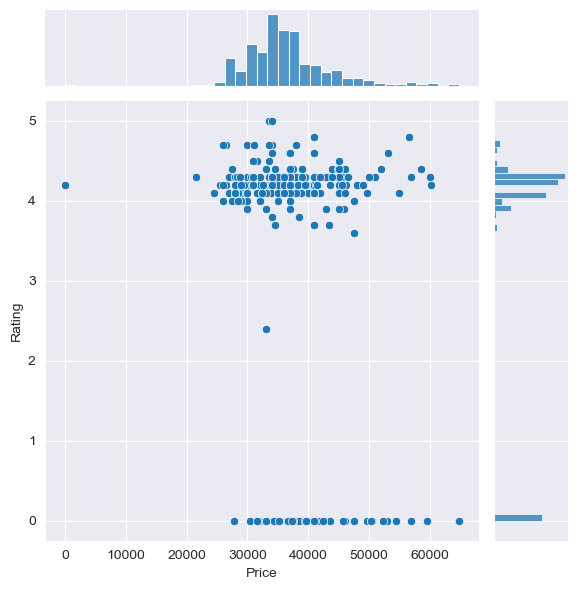

In [50]:
sns.jointplot(Data_Frame['Price'],Data_Frame['Rating'])

In [56]:
Data_Frame[Data_Frame['Brand']=='SAMSUNG'].head()

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1,36999,4.2,1.5
4,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
11,SAMSUNG,SAMSUNG Convertible 5,1700.0,111.0,1,33999,4.3,1.5
14,SAMSUNG,SAMSUNG Convertible 5,1490.0,111.0,1,35499,4.2,1.5
15,SAMSUNG,SAMSUNG Convertible 1.5 Ton 4 Star Split Inver...,832.0,111.0,1,33999,4.2,1.5


In [57]:
Data_Frame[Data_Frame['Brand']=='SAMSUNG'].tail()

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
379,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,1,27999,4.1,1.0
383,SAMSUNG,SAMSUNG Convertible 5,1700.0,111.0,1,33999,4.3,1.5
387,SAMSUNG,SAMSUNG 1.5 Ton 5 Star Split Inverter AC,832.0,111.0,1,36999,4.2,1.5
403,SAMSUNG,SAMSUNG Convertible 1 Ton 3 Star Split Inverte...,624.0,90.0,0,27999,4.1,1.0
407,SAMSUNG,SAMSUNG Convertible 5,1700.0,111.0,0,33999,4.3,1.5
